# Exercise: time series

- We will analyse data taken from the World Meteorological Organisation (WMO).

https://worldweather.wmo.int/en/dataguide.html

- Temperature (max, min), rainy days, rainfall for 12 months.

Guayaquil: https://worldweather.wmo.int/en/json/2048_en.json

- Python has an in-built function to read json files.

### Let's try to find correlations

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import json

### Open file

In [2]:
f = open("2048_en.json", "r")

In [3]:
type(f)

_io.TextIOWrapper

Documentation: https://www.geeksforgeeks.org/json-loads-in-python/#:~:text=json.-,loads(),JSON%20data%20into%20Python%20Dictionary.

In [4]:
data = json.loads(f.read())

In [5]:
type(data)

dict

In [6]:
print(data)

{'city': {'lang': 'en', 'cityName': 'Guayaquil', 'cityLatitude': '-2.153333000', 'cityLongitude': '-79.883333000', 'cityId': 2048, 'isCapital': False, 'stationName': 'Guayaquil', 'tourismURL': '', 'tourismBoardName': '', 'isDep': False, 'timeZone': '-0500', 'isDST': 'N', 'member': {'memId': 137, 'memName': 'Ecuador', 'shortMemName': '', 'url': 'www.inamhi.gob.ec', 'orgName': 'INSTITUTO NACIONAL DE METEOROLOGIA E HIDROLOGIA', 'logo': 'ecuador_logo.png', 'ra': 3}, 'forecast': {'issueDate': '2022-06-29 15:09:00', 'timeZone': 'Local', 'forecastDay': [{'forecastDate': '2022-06-30', 'wxdesc': '', 'weather': 'Partly Cloudy', 'minTemp': '21', 'maxTemp': '29', 'minTempF': '70', 'maxTempF': '84', 'weatherIcon': 2202}, {'forecastDate': '2022-07-01', 'wxdesc': '', 'weather': 'Partly Cloudy', 'minTemp': '22', 'maxTemp': '29', 'minTempF': '72', 'maxTempF': '84', 'weatherIcon': 2202}, {'forecastDate': '2022-07-02', 'wxdesc': '', 'weather': 'Partly Cloudy', 'minTemp': '22', 'maxTemp': '30', 'minTempF'

## JSON scheme

https://worldweather.wmo.int/en/json/WWIS_json_schema_v2.json

## Getting data by nesting

In [24]:
print(data["city"]["climate"]["climateMonth"][11])

{'month': 12, 'maxTemp': '31.8', 'minTemp': '22.4', 'meanTemp': None, 'maxTempF': '89.2', 'minTempF': '72.3', 'meanTempF': None, 'raindays': '9', 'rainfall': '68.0', 'climateFromMemDate': '2015-07-13'}


In [20]:
print(len(data["city"]["climate"]["climateMonth"]))

12


## Accessing data

In [43]:
month = []
minTemp = []
maxTemp = []
rainfall = []

for i in range (len(data["city"]["climate"]["climateMonth"])):
    
    month.append(data["city"]["climate"]["climateMonth"][i]["month"])
    minTemp.append(float(data["city"]["climate"]["climateMonth"][i]["minTemp"])) # Don't forget to convert to floats
    maxTemp.append(float(data["city"]["climate"]["climateMonth"][i]["maxTemp"])) # Don't forget to convert to floats 
    rainfall.append(float(data["city"]["climate"]["climateMonth"][i]["rainfall"])) # Don't forget to convert to floats 
    
print(month)
print(minTemp)
print(maxTemp)
    
month_array = np.array(month)
minTemp_array = np.array(minTemp)
maxTemp_array = np.array(maxTemp)
rainfall_array = np.array(rainfall)

print(month_array )
print(minTemp_array)
print(maxTemp_array)
print(rainfall_array)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[23.0, 23.4, 23.7, 23.5, 22.6, 21.5, 20.8, 20.7, 20.5, 20.9, 21.3, 22.4]
[31.2, 31.2, 32.2, 32.0, 31.2, 29.8, 29.1, 29.7, 30.5, 30.2, 31.1, 31.8]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[23.  23.4 23.7 23.5 22.6 21.5 20.8 20.7 20.5 20.9 21.3 22.4]
[31.2 31.2 32.2 32.  31.2 29.8 29.1 29.7 30.5 30.2 31.1 31.8]
[200.7 332.  315.7 207.2  62.6  34.   15.6   1.2   1.5   5.6  29.1  68. ]


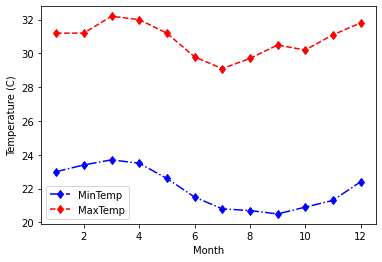

In [42]:
%matplotlib inline
# And now we plot
fig, ax = plt.subplots()

ax.plot(month_array, minTemp_array, color = 'blue', marker = 'd', linestyle = "-.", label="MinTemp") 

ax.plot(month_array, maxTemp_array, color = 'red', marker = 'd', linestyle = "--", label="MaxTemp") 

ax.set_xlabel('Month')

ax.set_ylabel('Temperature (C)')

ax.legend()

## Correlations:

Text(0, 0.5, 'Max Temperature (C)')

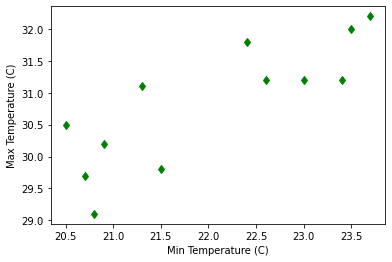

In [40]:
fig, ax = plt.subplots()

ax.plot(minTemp_array, maxTemp_array, color = 'green', marker = 'd', linestyle = " ") 


ax.set_xlabel('Min Temperature (C)')

ax.set_ylabel('Max Temperature (C)')

#ax.legend()

### Rainfall:

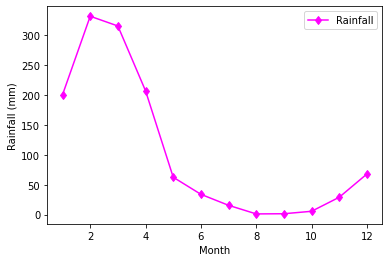

In [44]:
%matplotlib inline
# And now we plot
fig, ax = plt.subplots()

ax.plot(month_array, rainfall_array, color = 'magenta', marker = 'd', linestyle = "-", label="Rainfall") 

ax.set_xlabel('Month')

ax.set_ylabel('Rainfall (mm)')

ax.legend()

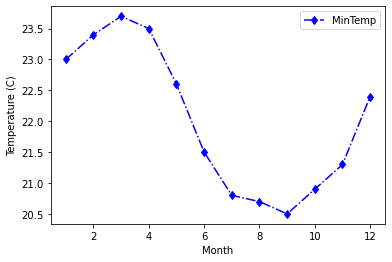

In [45]:
%matplotlib inline
# And now we plot
fig, ax = plt.subplots()

ax.plot(month_array, minTemp_array, color = 'blue', marker = 'd', linestyle = "-.", label="MinTemp") 

#ax.plot(month_array, maxTemp_array, color = 'red', marker = 'd', linestyle = "--", label="MaxTemp") 

ax.set_xlabel('Month')

ax.set_ylabel('Temperature (C)')

ax.legend()

Text(0, 0.5, 'Rainfall (mm)')

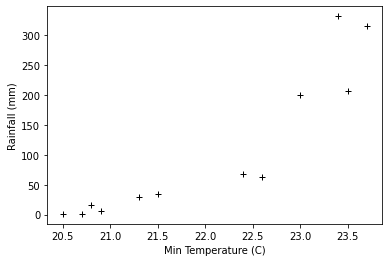

In [48]:
fig, ax = plt.subplots()

ax.plot(minTemp_array, rainfall_array, color = 'black', marker = '+', linestyle = " ") 


ax.set_xlabel('Min Temperature (C)')

ax.set_ylabel('Rainfall (mm)')

#ax.legend()